In [2]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# me defined 
from dataloader import DatasetGenerator as dg
from modeling import ModelBuilder as mbuilder
from evaluation import Evaluator as ev

In [2]:
# check if running on gpu
if tf.config.list_physical_devices('GPU'):
    print("Running on GPU")
else:
    print("Running on CPU")

Running on GPU


Synthetic Data

In [3]:
# 4 input values, each Gaussian distributed with 0 mean and 1 stdev
# 1 output value, distance from the origin, AKA L2-norm
# 1000 instances for training, 1000 for testing

In [5]:
# finding alpha
def trial_run(alpha):
    """
    Run a training and validation with the alpha value passed
    
    
    :param alpha: dense weighting factor alpha
    :return: validation loss
    """

    # Generate synthetic data
    n_train = 1000
    n_test = 1000
    loader = dg(n_train, n_test, alpha=alpha)

    mb = mbuilder()
    
    eva = ev()

    # Create and train the model
    hiddens = [64, 32, 8]
    model = mb.create_model_feat(4, 2, hiddens)
    # summarize and plot the model
    # model.summary()
    # plot_feature_space(model, X_train, y_train)
    # Plot the 2D feature space
    # eva.plot_feature_space(model, loader.X_train, loader.y_train)
    # eva.plot_feature_space(model, loader.X_test, loader.y_test)
    # add regression head
    extended_model = mb.add_regression_head(model)
    # train now with the regression stage with balanced loss
    history = mb.train_regression(
        extended_model, 
        loader.X_train, 
        loader.y_train, 
        loader.X_val,
        loader.y_val,
        learning_rate=1e-4,
        epochs=400, batch_size=16)
    # get the val mse
    val_mse = eva.evaluate(extended_model, loader.X_val, loader.y_val)
    # plots the feature space 
    # reset regression head
    base_model = mb.reset_regression_head(extended_model)
    # add new regression head
    extended_model2 = mb.add_regression_head(base_model)
    # freeze the features
    mb.freeze_features(extended_model2)
    # train the new head with balanced loss
    history = mb.train_regression(
        extended_model2, 
        loader.X_train, 
        loader.y_train, 
        loader.X_val,
        loader.y_val,
        loader.reweights, 
        loader.val_reweights,
        learning_rate=1e-4,
        epochs=400, batch_size=16)
    # get the val mse
    val_mse = eva.evaluate(extended_model2, loader.X_val, loader.y_val)

    return val_mse

alpha value 0.0
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 0.4510 - regression_head_loss: 0.4510 - val_loss: 0.2771 - val_regression_head_loss: 0.2771
Epoch 2/400
47/47 [==============================] - 0s 10ms/step - loss: 0.2191 - regression_head_loss: 0.2191 - val_loss: 0.1660 - val_regression_head_loss: 0.1660
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.1388 - regression_head_loss: 0.1388 - val_loss: 0.1116 - val_regression_head_loss: 0.1116
Epoch 4/400
47/47 [==============================] - 1s 11ms/step - loss: 0.1033 - regression_head_loss: 0.1033 - val_loss: 0.0948 - val_regression_head_loss: 0.0948
Epoch 5/400
47/47 [==============================] - 1s 13ms/step - loss: 0.0883 - regression_head_loss: 0.0883 - val_loss: 0.0860 - val_regression_head_loss: 0.0860
Epoch 6/400
47/47 [==============================] - 0s 10ms/step - loss: 0.0788 - regression_head_los

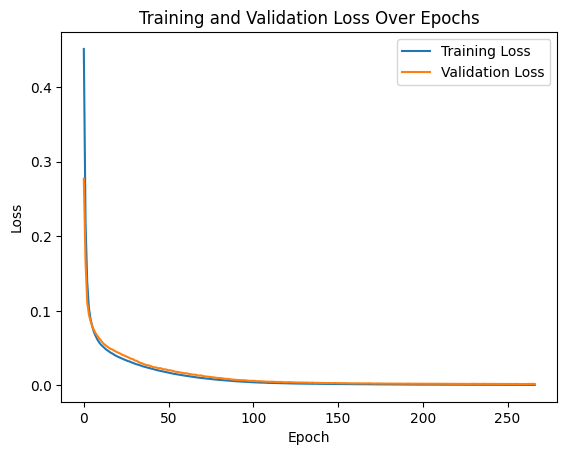

Epoch 1/258
63/63 [==============================] - 0s 6ms/step - loss: 0.0010 - regression_head_loss: 0.0010
Epoch 2/258
63/63 [==============================] - 0s 6ms/step - loss: 0.0010 - regression_head_loss: 0.0010
Epoch 3/258
63/63 [==============================] - 0s 6ms/step - loss: 9.7401e-04 - regression_head_loss: 9.7401e-04
Epoch 4/258
63/63 [==============================] - 0s 7ms/step - loss: 9.9972e-04 - regression_head_loss: 9.9972e-04
Epoch 5/258
63/63 [==============================] - 0s 6ms/step - loss: 9.5499e-04 - regression_head_loss: 9.5499e-04
Epoch 6/258
63/63 [==============================] - 0s 6ms/step - loss: 9.0441e-04 - regression_head_loss: 9.0441e-04
Epoch 7/258
63/63 [==============================] - 0s 6ms/step - loss: 8.5044e-04 - regression_head_loss: 8.5044e-04
Epoch 8/258
63/63 [==============================] - 0s 6ms/step - loss: 8.6584e-04 - regression_head_loss: 8.6584e-04
Epoch 9/258
63/63 [==============================] - 0s 6ms/step

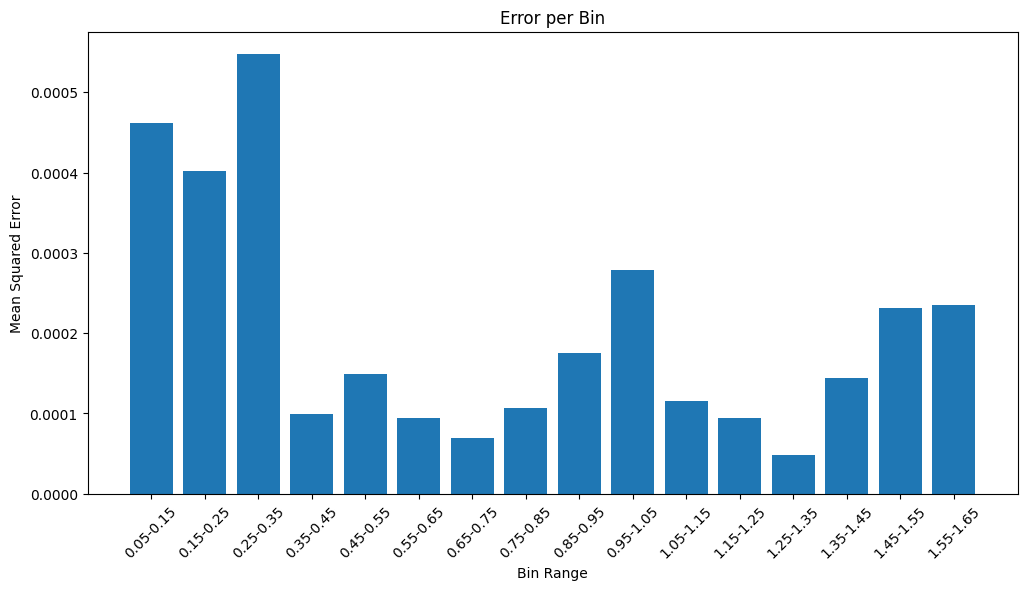

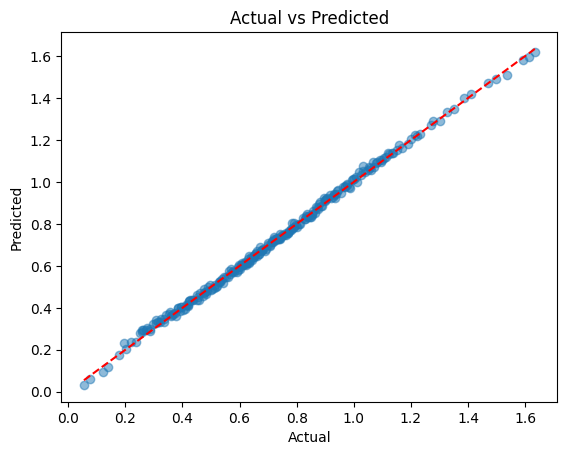

Sample with y = 0.26175955719214267 belongs to bin 3 and has an error of 0.033275179202739535
Sample with y = 0.30773926799432083 belongs to bin 3 and has an error of 0.03585090215071396
Sample with y = 0.19636694326360757 belongs to bin 2 and has an error of 0.03712629542390769
Sample with y = 0.25741983164071636 belongs to bin 3 and has an error of 0.03919111978292866
Sample with y = 1.0330780631814926 belongs to bin 10 and has an error of 0.04342425996914212
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 17ms/step - loss: 0.2216 - regression_head_loss: 0.2216 - val_loss: 0.2173 - val_regression_head_loss: 0.2173
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.2196 - regression_head_loss: 0.2196 - val_loss: 0.2152 - val_regression_head_loss: 0.2152
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.2175 - regression_head_loss: 0.2175 - val_loss: 0.2133 - val_regression_hea

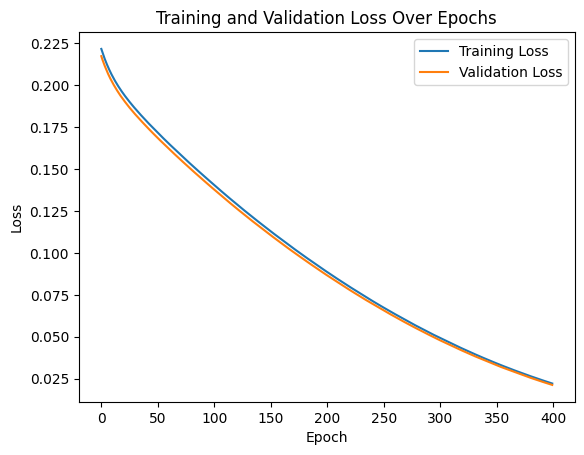

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0217 - regression_head_loss: 0.0217
Epoch 2/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0214 - regression_head_loss: 0.0214
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0211 - regression_head_loss: 0.0211
Epoch 4/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0209 - regression_head_loss: 0.0209
Epoch 5/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0206 - regression_head_loss: 0.0206
Epoch 6/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0203 - regression_head_loss: 0.0203
Epoch 7/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0200 - regression_head_loss: 0.0200
Epoch 8/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0197 - regression_head_loss: 0.0197
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0195 - regression_head_loss: 0.0195
E

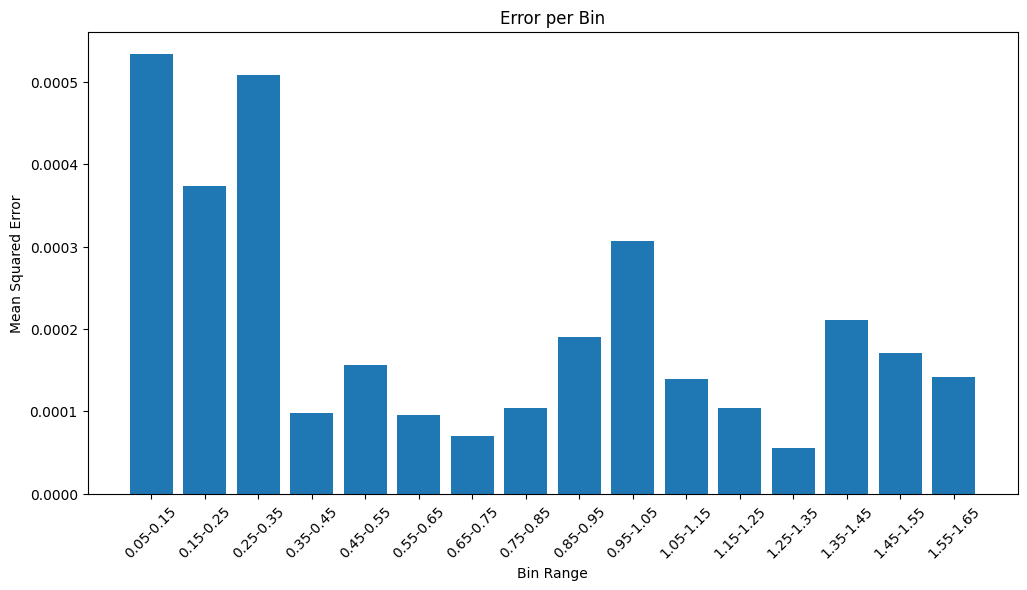

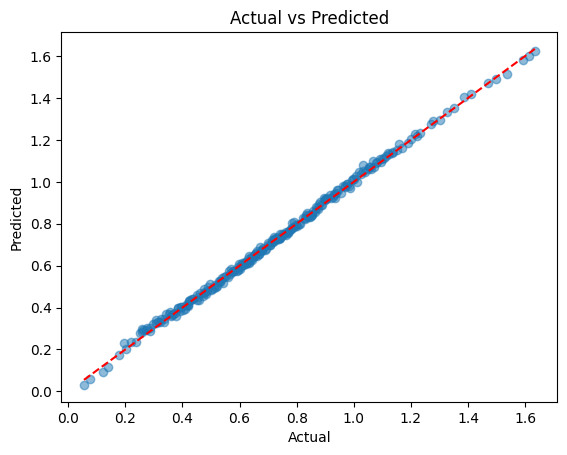

Sample with y = 0.26175955719214267 belongs to bin 3 and has an error of 0.032238624627773105
Sample with y = 0.30773926799432083 belongs to bin 3 and has an error of 0.034951348851763764
Sample with y = 0.19636694326360757 belongs to bin 2 and has an error of 0.03591828808824485
Sample with y = 0.25741983164071636 belongs to bin 3 and has an error of 0.03815897595167561
Sample with y = 1.0330780631814926 belongs to bin 10 and has an error of 0.04480386907711331
alpha value 0.1
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 10ms/step - loss: 0.7789 - regression_head_loss: 0.7789 - val_loss: 0.6547 - val_regression_head_loss: 0.6547
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 0.4458 - regression_head_loss: 0.4458 - val_loss: 0.3708 - val_regression_head_loss: 0.3708
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 0.2412 - regression_head_loss: 0.2412 - val_loss: 0.1924 - v

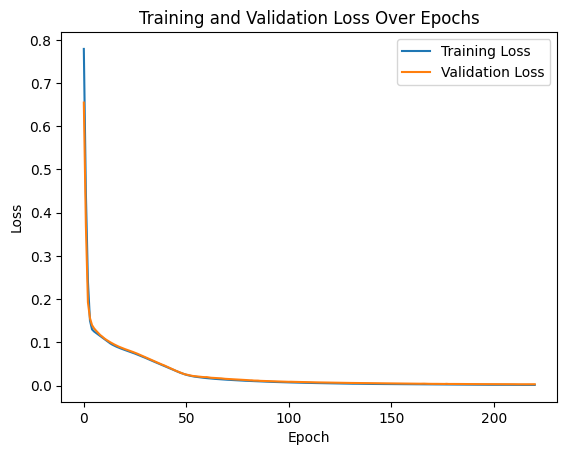

Epoch 1/212
63/63 [==============================] - 1s 15ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 2/212
63/63 [==============================] - 1s 18ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 3/212
63/63 [==============================] - 3s 53ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 4/212
63/63 [==============================] - 5s 74ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 5/212
63/63 [==============================] - 4s 68ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 6/212
63/63 [==============================] - 7s 108ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 7/212
63/63 [==============================] - 4s 59ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 8/212
63/63 [==============================] - 5s 75ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 9/212
63/63 [==============================] - 5s 81ms/step - loss: 0.0016 - regression_head_loss

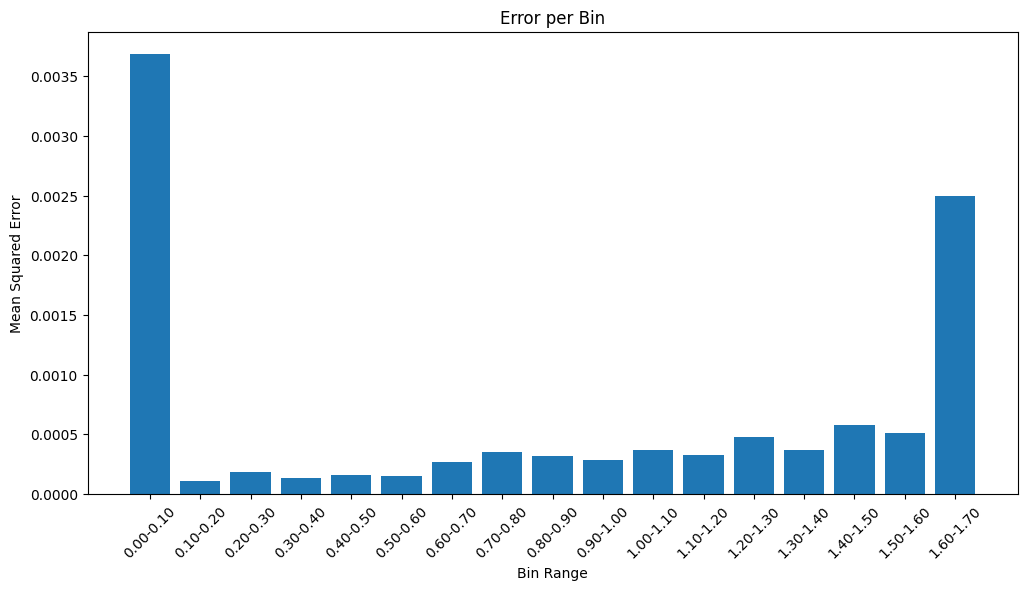

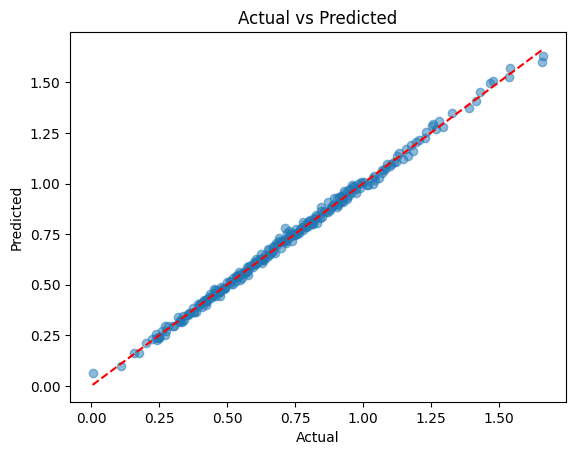

Sample with y = 1.037275025594257 belongs to bin 11 and has an error of 0.03845782016517996
Sample with y = 0.6892993302909953 belongs to bin 7 and has an error of 0.041215434494771275
Sample with y = 0.004298363723027306 belongs to bin 1 and has an error of 0.060740943156016275
Sample with y = 1.661143223728216 belongs to bin 17 and has an error of 0.062106649364507494
Sample with y = 0.7121724236999318 belongs to bin 8 and has an error of 0.06816717495576885
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 15ms/step - loss: 4.0977 - regression_head_loss: 4.0977 - val_loss: 4.0789 - val_regression_head_loss: 4.0789
Epoch 2/400
47/47 [==============================] - 1s 20ms/step - loss: 4.0562 - regression_head_loss: 4.0562 - val_loss: 4.0375 - val_regression_head_loss: 4.0375
Epoch 3/400
47/47 [==============================] - 0s 10ms/step - loss: 4.0151 - regression_head_loss: 4.0151 - val_loss: 3.9966 - val_regression_he

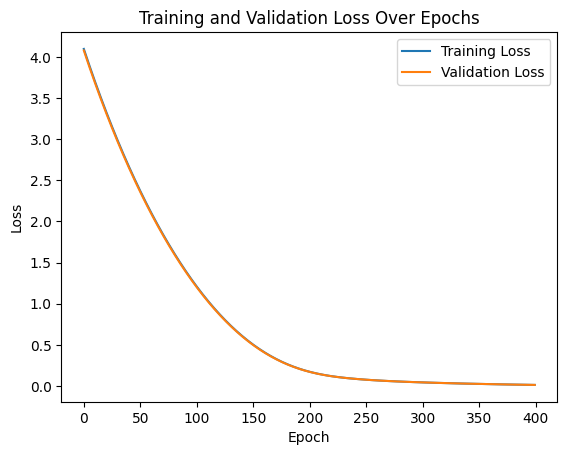

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0130 - regression_head_loss: 0.0130
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0127 - regression_head_loss: 0.0127
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0124 - regression_head_loss: 0.0124
Epoch 4/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0122 - regression_head_loss: 0.0122
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0119 - regression_head_loss: 0.0119
Epoch 6/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0117 - regression_head_loss: 0.0117
Epoch 7/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0115 - regression_head_loss: 0.0115
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0112 - regression_head_loss: 0.0112
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0110 - regression_head_loss: 0.0110
E

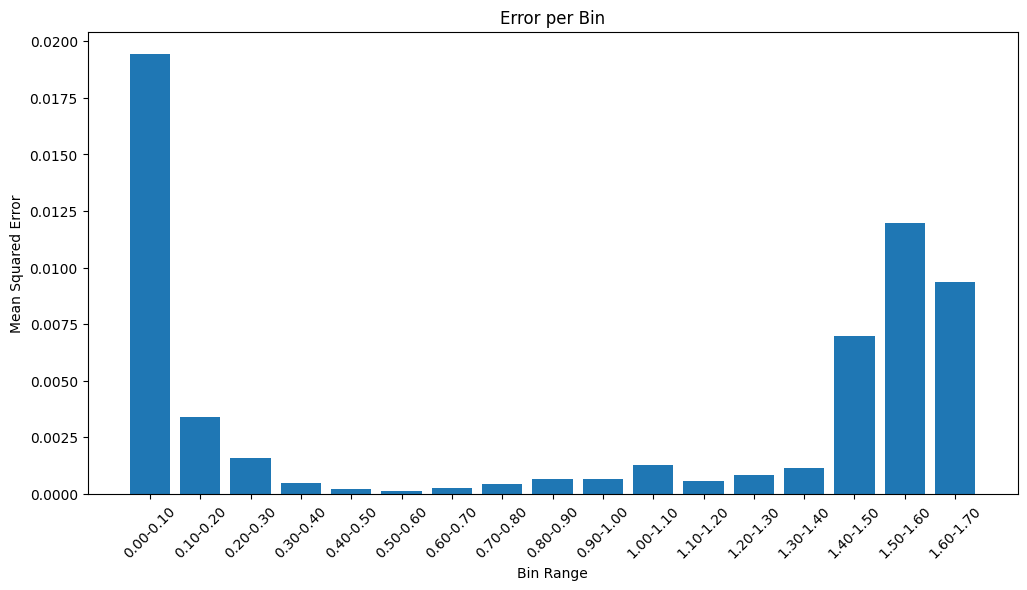

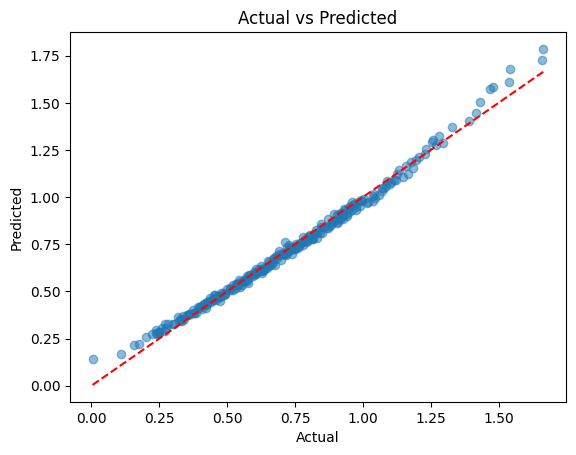

Sample with y = 1.4669734473345148 belongs to bin 15 and has an error of 0.10415825890327812
Sample with y = 1.4793094593405691 belongs to bin 15 and has an error of 0.10450492321253146
Sample with y = 1.6653373478695828 belongs to bin 17 and has an error of 0.12036845695524634
Sample with y = 1.5421580769335128 belongs to bin 16 and has an error of 0.13756733162056434
Sample with y = 0.004298363723027306 belongs to bin 1 and has an error of 0.13946422477794926
alpha value 0.2
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 23ms/step - loss: 1.5310 - regression_head_loss: 1.5310 - val_loss: 1.3755 - val_regression_head_loss: 1.3755
Epoch 2/400
47/47 [==============================] - 0s 10ms/step - loss: 1.0970 - regression_head_loss: 1.0970 - val_loss: 0.8639 - val_regression_head_loss: 0.8639
Epoch 3/400
47/47 [==============================] - 0s 11ms/step - loss: 0.6476 - regression_head_loss: 0.6476 - val_loss: 0.4121 - 

In [ ]:
# search alpha from 0 to 1.5 at .1 increments 
best_error, best_alpha = np.inf, 0
for alpha in np.arange(0, 1.6, 0.1):
    print(f'alpha value {alpha}')
    res = trial_run(alpha)
    if res < best_error:
        best_error = res
        best_alpha = alpha
        
print(f'best alpha {best_alpha}, best error {best_error}')
    

(1000,)
min_val y in before norm:  0.30336393039835013
max_val y in before norm:  4.602297725798119
(1000,)
min_val y in before norm:  0.2292676773559074
max_val y in before norm:  4.752819850356652


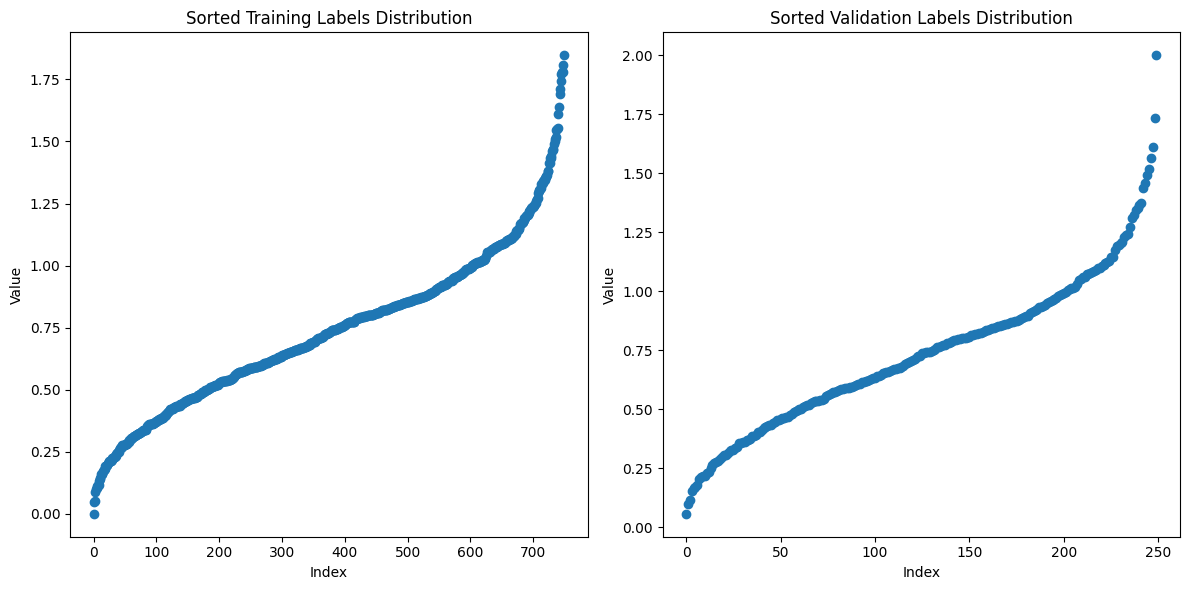

X_train:  [[-0.62246223  0.37896541  0.21532772 -2.16766725]
 [ 0.50407224 -1.44429391 -1.31738916  0.12623662]
 [-0.22978148  1.18858544  2.19576143  0.97595628]
 [-1.14883365  0.98882227 -0.71678588 -0.12967708]
 [-1.69861637 -0.93105842  0.02002657  1.48129898]
 [ 0.40211501  0.59275706 -0.50991036 -0.22049538]
 [ 0.44028985 -0.11207012 -0.1546883   0.28030167]
 [-0.37405381 -0.83444779  1.29430155 -1.35414339]
 [ 1.67955003  2.03392997  0.36869044  0.23041094]
 [-0.53239869  0.13008385  1.52273453 -1.05225906]
 [-2.58664602 -0.01454441 -0.37231966 -1.26076598]
 [ 1.38762586  1.3406884  -0.05532299 -0.61273053]]
Validation X: [[-0.89592699  3.11393197 -0.65646787  3.20170842]
 [ 0.66104885  2.40149081  1.95706127 -2.48936725]
 [-2.10163958 -2.47100594  1.90285098  0.12385374]
 [ 2.02124241 -0.60490302  2.90250703 -0.75928997]
 [-2.82907244  1.91014557  0.23055476 -1.01569873]
 [ 1.67124521  2.53629347 -0.51551679 -1.69204259]
 [-0.52082416  1.60424746  2.99078118 -0.18376957]
 [-1.3

In [3]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)
print(loader.min_y, loader.max_y)

Model Building

In [5]:
# NN for representation learning:
# 4 input nodes
# 1 or more hidden layers
# the last hidden layer has 2 nodes (representation layer Z)
# plot the instances in the 2D feature/representation space of Z 
# use different colors for different target values (can be in groups, each group with a different color) similar to the RankSim pictures
# training and test sets in different plots.
# expecting the instances to be in a semi-circle
# for prediction, add output layer of 1 node.

mb = mb()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0     

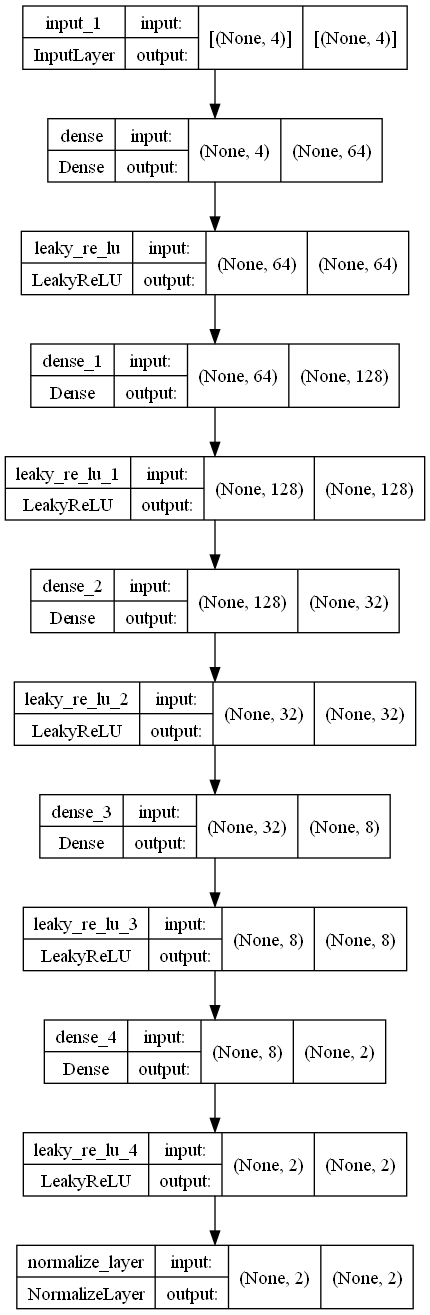

In [6]:
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
model.summary()

Test of First Idea improving on ranksim

In [7]:
eva = ev()

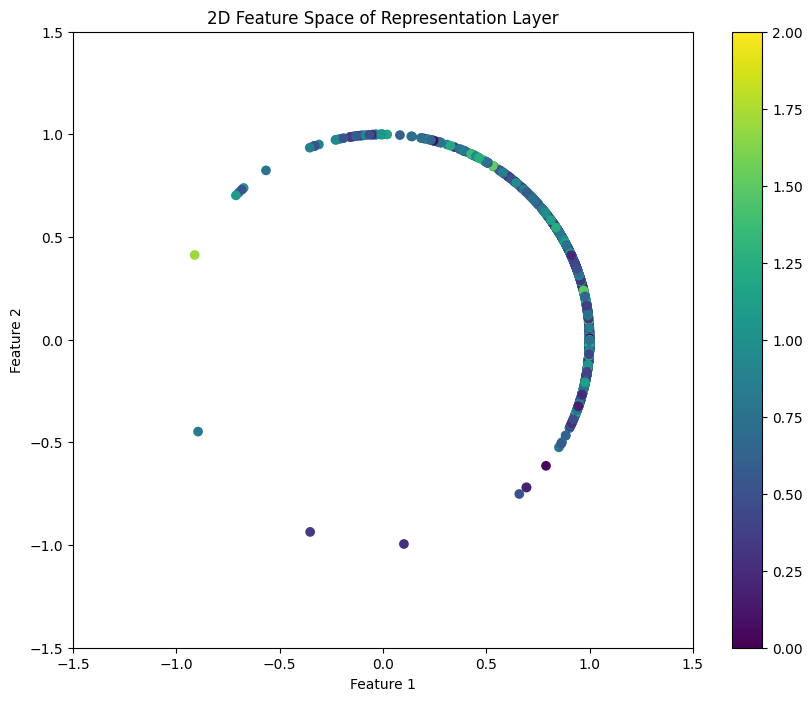

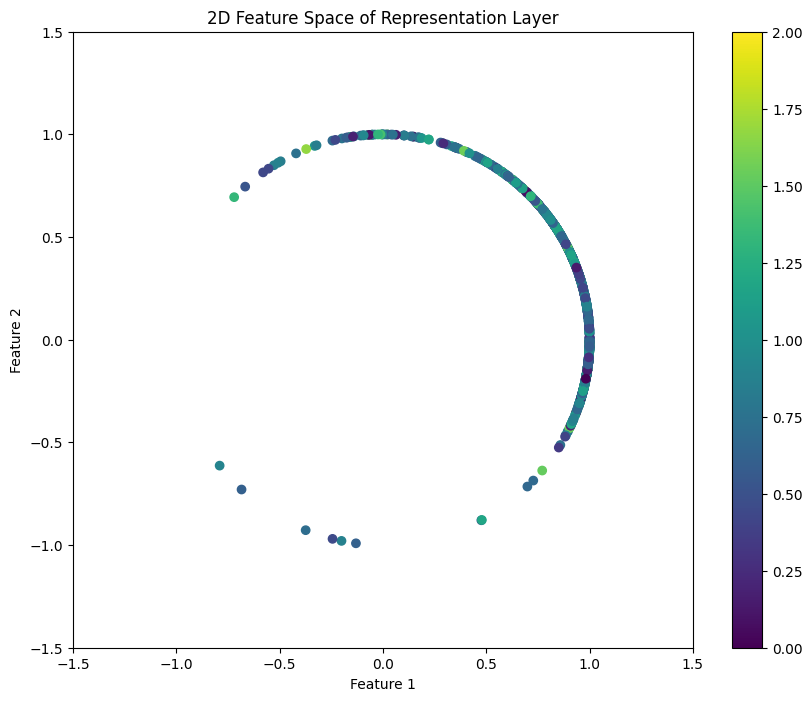

In [8]:
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 9s 183ms/step - loss: 0.1893 - val_loss: 0.1390
Epoch 2/400
44/44 [==============================] - 8s 177ms/step - loss: 0.1217 - val_loss: 0.1353
Epoch 3/400
44/44 [==============================] - 8s 173ms/step - loss: 0.1141 - val_loss: 0.1359
Epoch 4/400
44/44 [==============================] - 8s 174ms/step - loss: 0.1203 - val_loss: 0.1350
Epoch 5/400
44/44 [==============================] - 8s 171ms/step - loss: 0.1226 - val_loss: 0.1286
Epoch 6/400
44/44 [==============================] - 7s 163ms/step - loss: 0.1072 - val_loss: 0.1052
Epoch 7/400
44/44 [==============================] - 7s 170ms/step - loss: 0.0743 - val_loss: 0.0516
Epoch 8/400
44/44 [==============================] - 8s 174ms/step - loss: 0.0455 - val_loss: 0.0291
Epoch 9/400
44/44 [==============================] - 7s 163ms/step - loss: 0.0223 - val_loss: 0.0292
Epoch 10/400
44/44 [==================

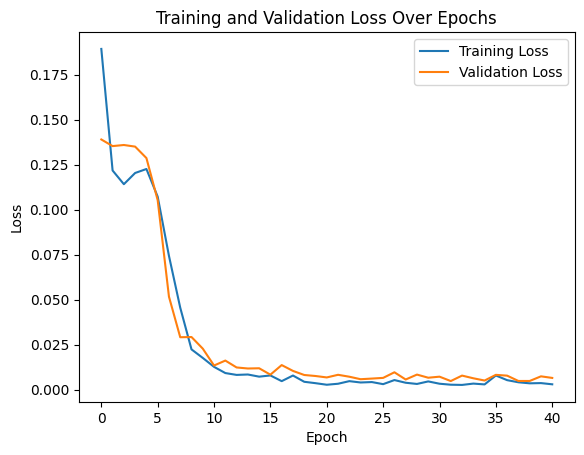

Epoch 1/32
63/63 [==============================] - 11s 149ms/step - loss: 0.0093
Epoch 2/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0078
Epoch 3/32
63/63 [==============================] - 9s 149ms/step - loss: 0.0063
Epoch 4/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0049
Epoch 5/32
63/63 [==============================] - 9s 149ms/step - loss: 0.0061
Epoch 6/32
63/63 [==============================] - 10s 151ms/step - loss: 0.0034
Epoch 7/32
63/63 [==============================] - 9s 151ms/step - loss: 0.0066
Epoch 8/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0051
Epoch 9/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0041
Epoch 10/32
63/63 [==============================] - 9s 151ms/step - loss: 0.0031
Epoch 11/32
63/63 [==============================] - 9s 150ms/step - loss: 0.0021
Epoch 12/32
63/63 [==============================] - 10s 153ms/step - loss: 0.0022
Epoch 13/32
63/63 [===

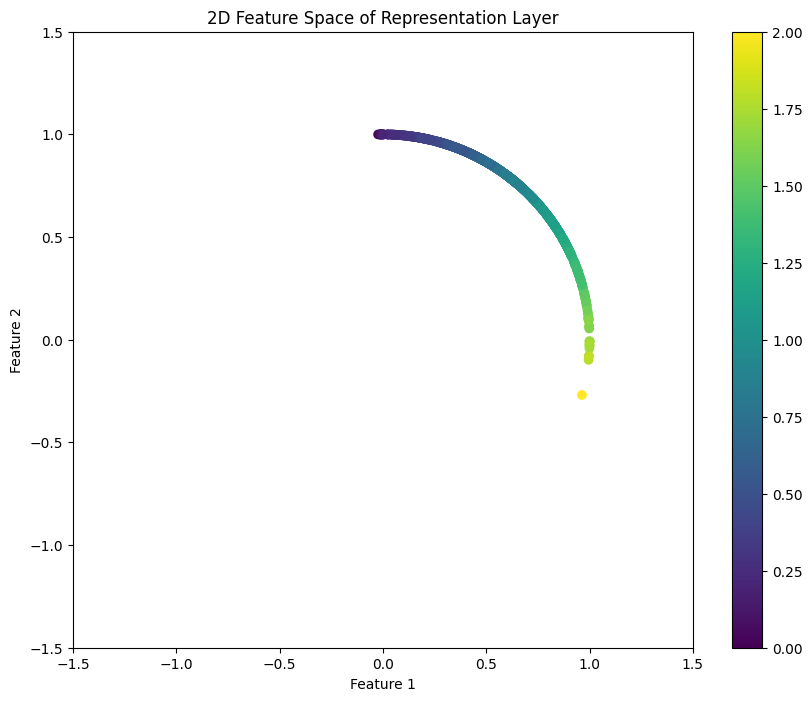

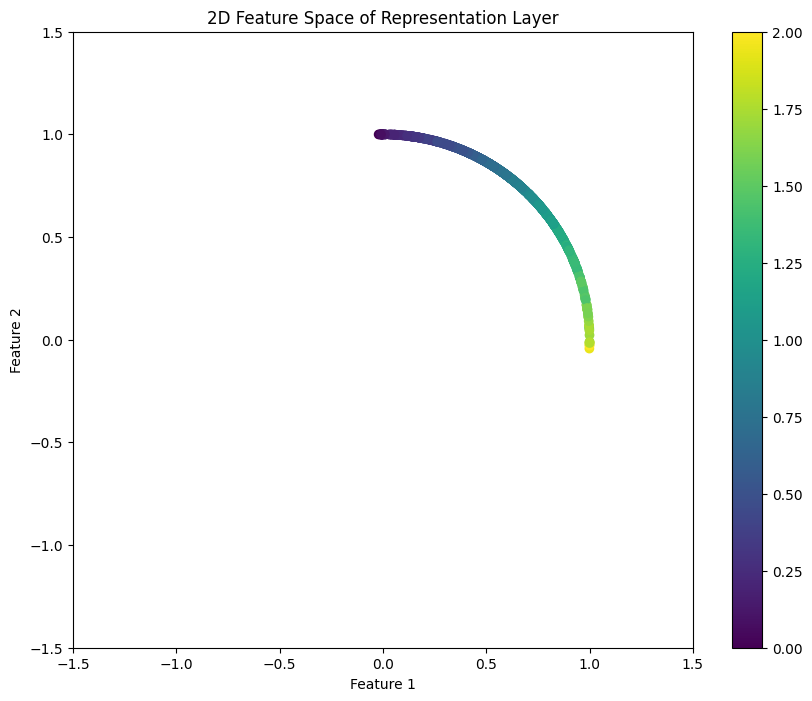

In [8]:
history = mb.train_features(model, loader.X_train, loader.y_train, learning_rate=1e-3, epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0   

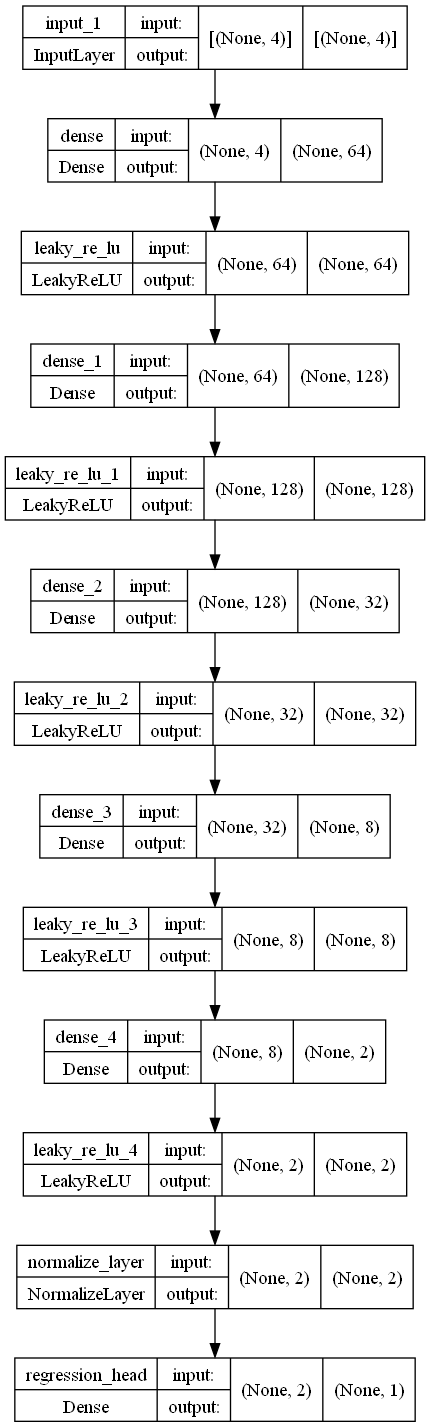

In [8]:
# add regression head
extended_model = mb.add_regression_head(model)
# summarize and plot the model
extended_model.summary()
# tf.keras.utils.plot_model(extended_model, show_shapes=True)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 2s 20ms/step - loss: 0.4602 - regression_head_loss: 0.4602 - regression_head_mse: 0.4884 - val_loss: 0.3065 - val_regression_head_loss: 0.3065 - val_regression_head_mse: 0.3115
Epoch 2/400
44/44 [==============================] - 1s 12ms/step - loss: 0.2095 - regression_head_loss: 0.2095 - regression_head_mse: 0.2062 - val_loss: 0.1420 - val_regression_head_loss: 0.1420 - val_regression_head_mse: 0.1251
Epoch 3/400
44/44 [==============================] - 1s 20ms/step - loss: 0.1007 - regression_head_loss: 0.1007 - regression_head_mse: 0.0839 - val_loss: 0.0773 - val_regression_head_loss: 0.0773 - val_regression_head_mse: 0.0550
Epoch 4/400
44/44 [==============================] - 1s 12ms/step - loss: 0.0561 - regression_head_loss: 0.0561 - regression_head_mse: 0.0377 - val_loss: 0.0469 - val_regression_head_loss: 0.0469 - val_regression_head_mse: 0.0268
Epoch 5/400
44/44 [========

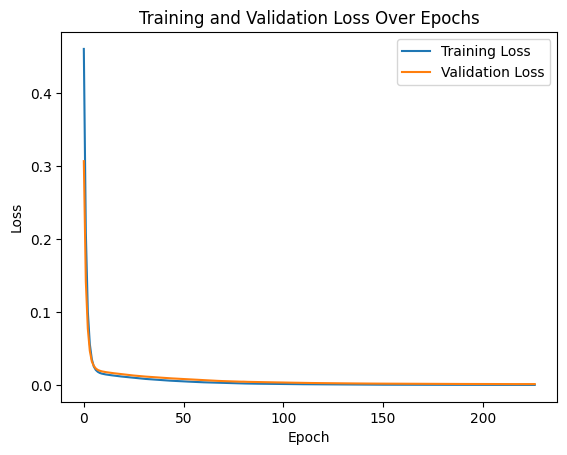

Epoch 1/218
63/63 [==============================] - 1s 7ms/step - loss: 5.6956e-04 - regression_head_loss: 5.6956e-04 - regression_head_mse: 2.4546e-04
Epoch 2/218
63/63 [==============================] - 0s 6ms/step - loss: 5.0512e-04 - regression_head_loss: 5.0512e-04 - regression_head_mse: 2.1539e-04
Epoch 3/218
63/63 [==============================] - 0s 5ms/step - loss: 4.5672e-04 - regression_head_loss: 4.5672e-04 - regression_head_mse: 1.9911e-04
Epoch 4/218
63/63 [==============================] - 0s 6ms/step - loss: 4.4014e-04 - regression_head_loss: 4.4014e-04 - regression_head_mse: 1.9679e-04
Epoch 5/218
63/63 [==============================] - 0s 5ms/step - loss: 4.2861e-04 - regression_head_loss: 4.2861e-04 - regression_head_mse: 2.0386e-04
Epoch 6/218
63/63 [==============================] - 0s 5ms/step - loss: 3.9701e-04 - regression_head_loss: 3.9701e-04 - regression_head_mse: 1.8616e-04
Epoch 7/218
63/63 [==============================] - 0s 5ms/step - loss: 3.7646e-0

In [9]:
# train now with the regression stage with balanced loss
history = mb.train_regression(extended_model, loader.X_train, loader.y_train, loader.reweights, learning_rate=1e-4,
                              epochs=400, batch_size=16)

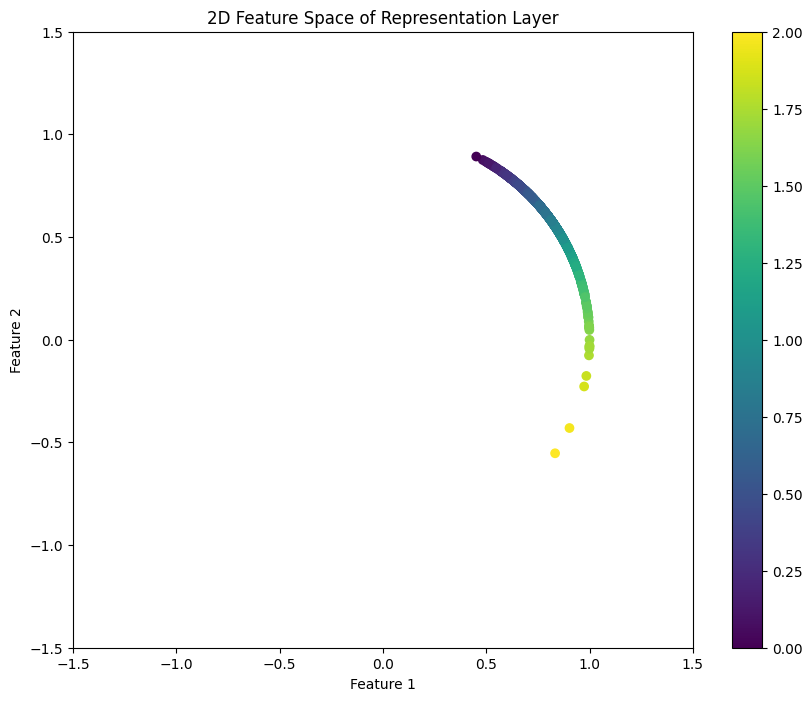

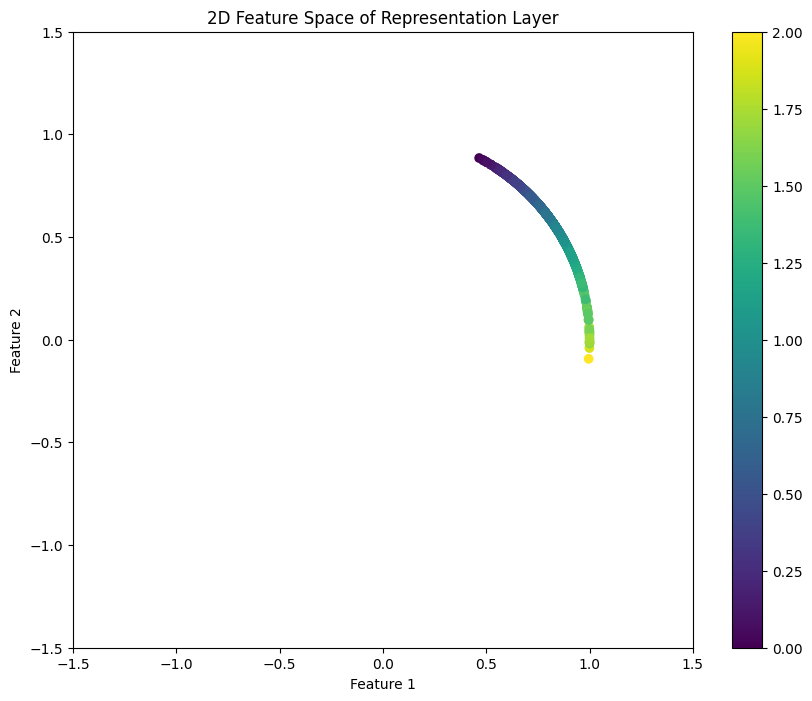

In [10]:
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)

In [ ]:
eva.evaluate(extended_model, loader.X_train, loader.y_train)

Mean Squared Error: 0.0004578082007355988
Root Mean Squared Error: 0.02139645256102085


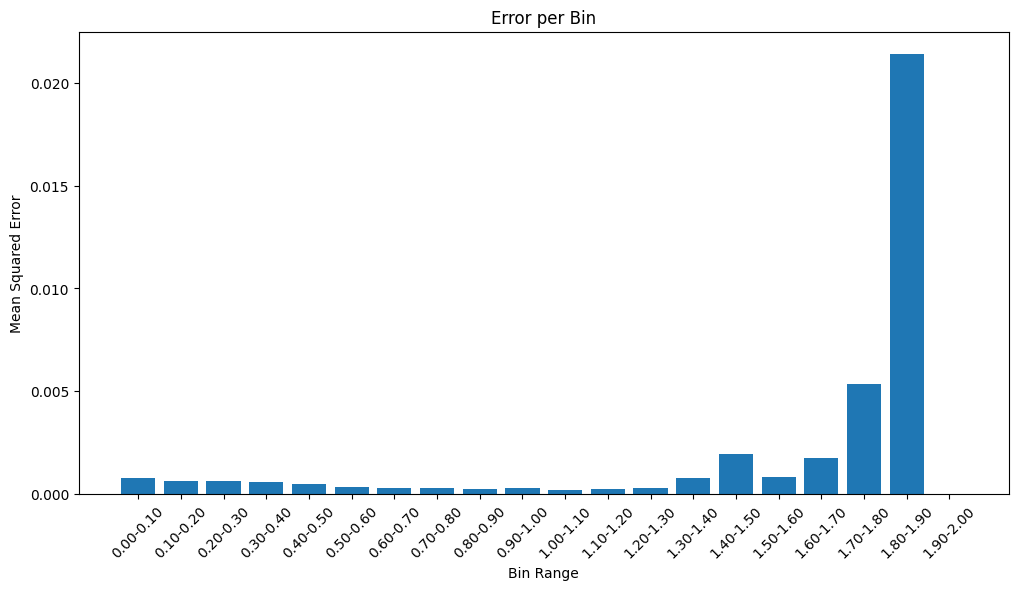

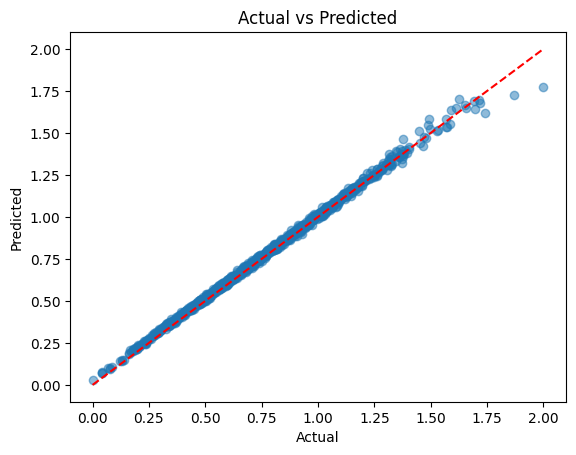

Sample with y = 1.3781939245040011 belongs to bin 14 and has an error of 0.08386259309701205
Sample with y = 1.4914006289943011 belongs to bin 15 and has an error of 0.09252247243086975
Sample with y = 1.739975615093097 belongs to bin 18 and has an error of 0.1185918288916199
Sample with y = 1.870703853135541 belongs to bin 19 and has an error of 0.14640132284684482
Sample with y = 2.0 belongs to bin 21 and has an error of 0.22859013080596924


0.0004578082

In [11]:
eva.evaluate(extended_model, loader.X_test, loader.y_test)

rRT

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 3s 43ms/step - loss: 0.3454 - regression_head_loss: 0.3454 - val_loss: 0.2128 - val_regression_head_loss: 0.2128
Epoch 2/400
47/47 [==============================] - 2s 44ms/step - loss: 0.1803 - regression_head_loss: 0.1803 - val_loss: 0.1548 - val_regression_head_loss: 0.1548
Epoch 3/400
47/47 [==============================] - 1s 23ms/step - loss: 0.1385 - regression_head_loss: 0.1385 - val_loss: 0.1363 - val_regression_head_loss: 0.1363
Epoch 4/400
47/47 [==============================] - 2s 42ms/step - loss: 0.1221 - regression_head_loss: 0.1221 - val_loss: 0.1275 - val_regression_head_loss: 0.1275
Epoch 5/400
47/47 [==============================] - 3s 59ms/step - loss: 0.1141 - regression_head_loss: 0.1141 - val_loss: 0.1227 - val_regression_head_loss: 0.1227
Epoch 6/400
47/47 [==============================] - 1s 18ms/step - loss: 0.1096 - regression_head_loss: 0.1096 - val

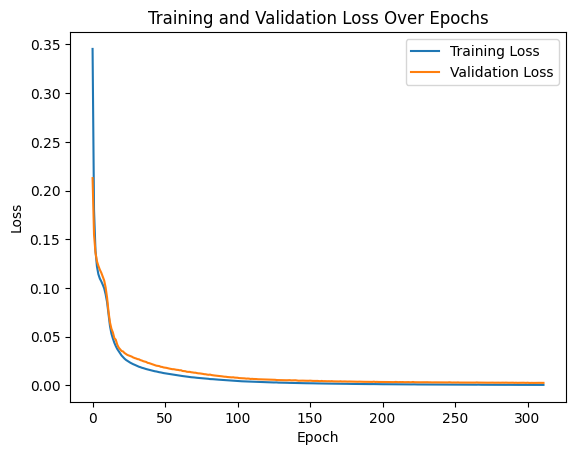

Epoch 1/303
63/63 [==============================] - 0s 6ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 2/303
63/63 [==============================] - 0s 5ms/step - loss: 9.6194e-04 - regression_head_loss: 9.6194e-04
Epoch 3/303
63/63 [==============================] - 0s 6ms/step - loss: 0.0010 - regression_head_loss: 0.0010
Epoch 4/303
63/63 [==============================] - 0s 5ms/step - loss: 9.9483e-04 - regression_head_loss: 9.9483e-04
Epoch 5/303
63/63 [==============================] - 0s 5ms/step - loss: 9.1723e-04 - regression_head_loss: 9.1723e-04
Epoch 6/303
63/63 [==============================] - 0s 5ms/step - loss: 8.3916e-04 - regression_head_loss: 8.3916e-04
Epoch 7/303
63/63 [==============================] - 0s 6ms/step - loss: 8.1538e-04 - regression_head_loss: 8.1538e-04
Epoch 8/303
63/63 [==============================] - 0s 5ms/step - loss: 7.9417e-04 - regression_head_loss: 7.9417e-04
Epoch 9/303
63/63 [==============================] - 0s 5ms/step

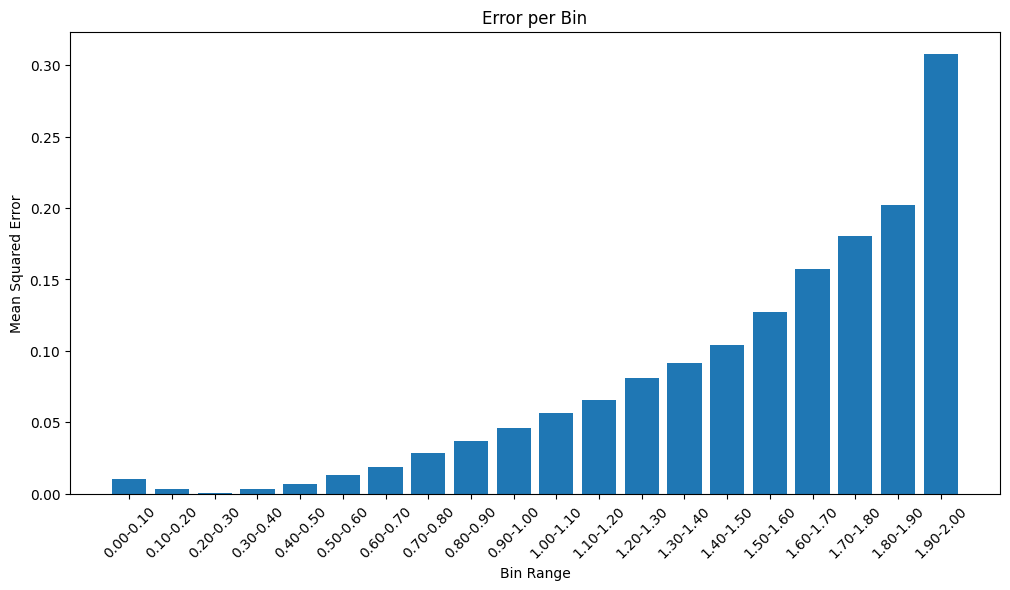

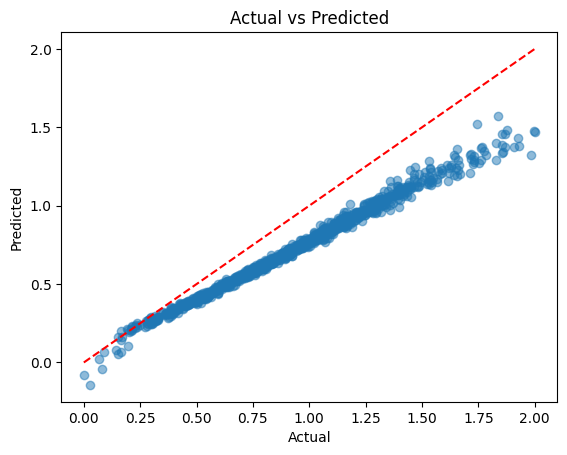

Sample with y = 2.0 belongs to bin 21 and has an error of 0.5327298641204834
Sample with y = 1.908139333330971 belongs to bin 20 and has an error of 0.5351519437664569
Sample with y = 1.8301423372701244 belongs to bin 19 and has an error of 0.5364914717153149
Sample with y = 1.9302030447765026 belongs to bin 20 and has an error of 0.5491575840755138
Sample with y = 1.9827730391268257 belongs to bin 20 and has an error of 0.6569599840883735


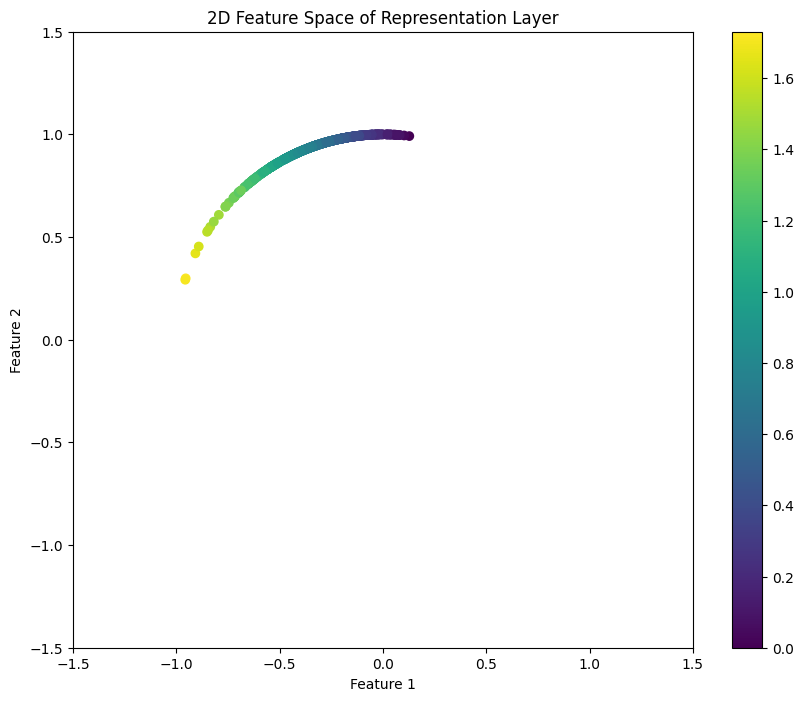

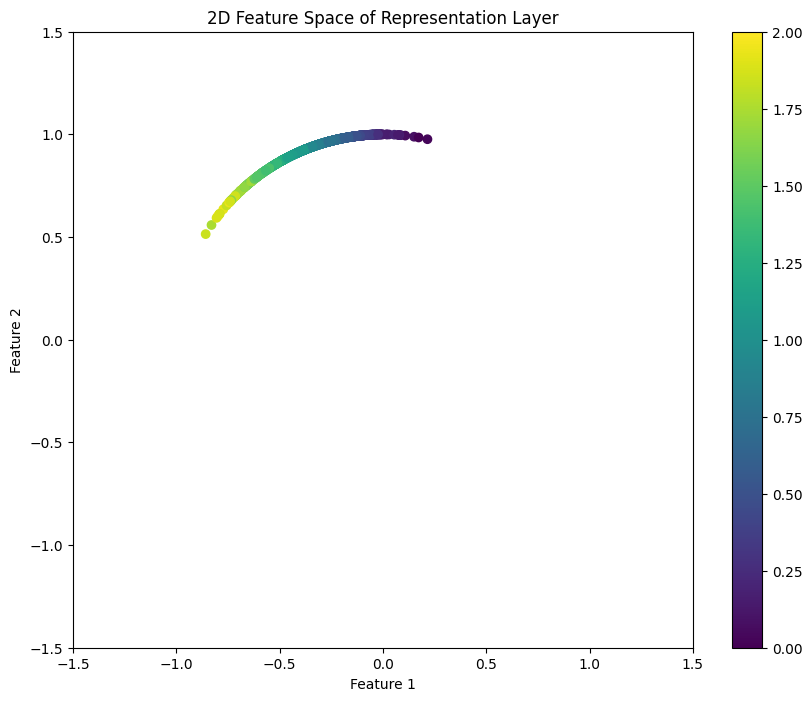

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 11ms/step - loss: 3.5711 - regression_head_loss: 3.5711 - val_loss: 3.5475 - val_regression_head_loss: 3.5475
Epoch 2/400
47/47 [==============================] - 0s 6ms/step - loss: 3.5329 - regression_head_loss: 3.5329 - val_loss: 3.5090 - val_regression_head_loss: 3.5090
Epoch 3/400
47/47 [==============================] - 0s 6ms/step - loss: 3.4946 - regression_head_loss: 3.4946 - val_loss: 3.4714 - val_regression_head_loss: 3.4714
Epoch 4/400
47/47 [==============================] - 0s 7ms/step - loss: 3.4568 - regression_head_loss: 3.4568 - val_loss: 3.4338 - val_regression_head_loss: 3.4338
Epoch 5/400
47/47 [==============================] - 0s 7ms/step - loss: 3.4192 - regression_head_loss: 3.4192 - val_loss: 3.3965 - val_regression_head_loss: 3.3965
Epoch 6/400
47/47 [==============================] - 0s 7ms/step - loss: 3.3819 - regression_head_loss: 3.3819 - val_loss

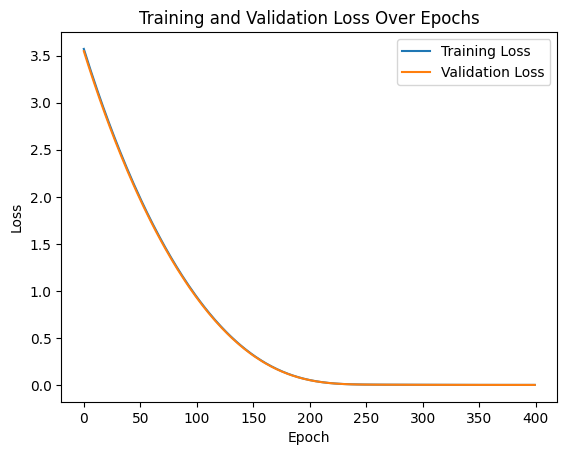

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 3/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 4/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 5/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 6/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 7/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 9/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
E

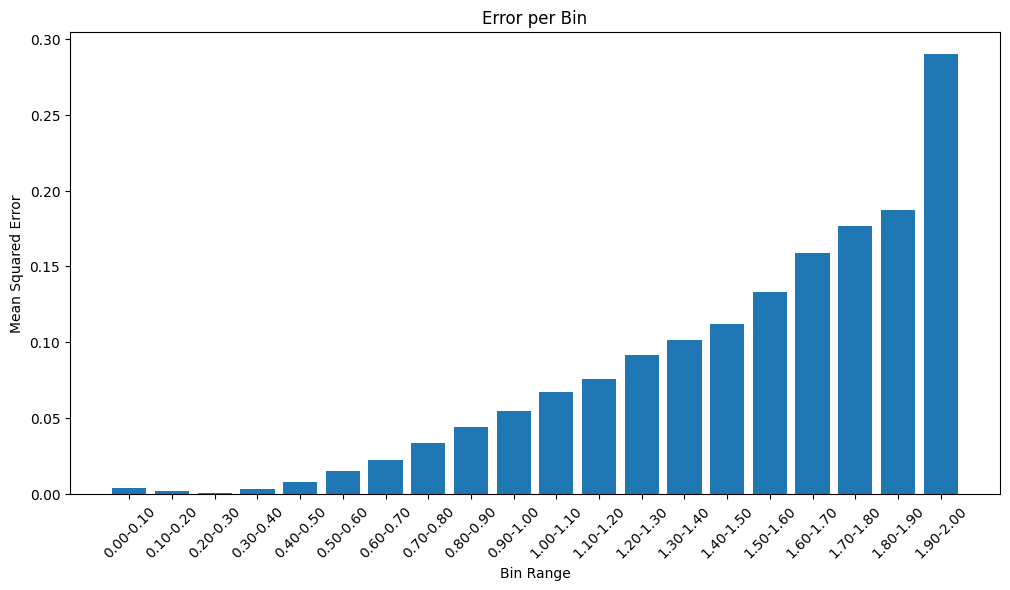

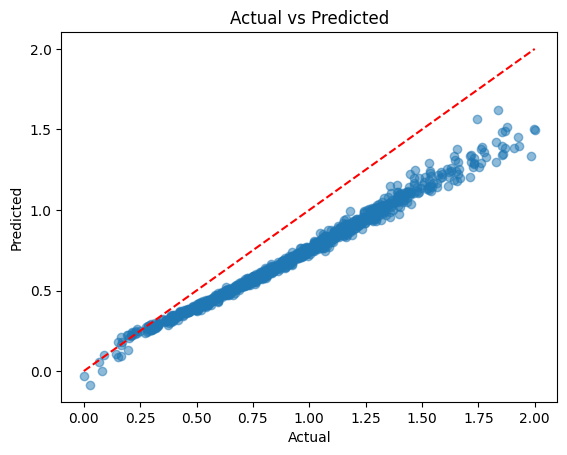

Sample with y = 1.8548077159266925 belongs to bin 19 and has an error of 0.513717632804439
Sample with y = 1.908139333330971 belongs to bin 20 and has an error of 0.5222030731075824
Sample with y = 1.8301423372701244 belongs to bin 19 and has an error of 0.5336833776906567
Sample with y = 1.9302030447765026 belongs to bin 20 and has an error of 0.5350385550304089
Sample with y = 1.9827730391268257 belongs to bin 20 and has an error of 0.65032932498498


In [4]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)

mb = mbuilder()

eva = ev()
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
# model.summary()
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
# eva.plot_feature_space(model, loader.X_train, loader.y_train)
# eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_regression(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-4,
    epochs=400, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)
# plots the feature space 
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)
# reset regression head
base_model = mb.reset_regression_head(extended_model)
# add new regression head
extended_model2 = mb.add_regression_head(base_model)
# freeze the features
mb.freeze_features(extended_model2)
# train the new head with balanced loss
history = mb.train_regression(
    extended_model2, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=400, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model2, loader.X_test, loader.y_test)

rRT + AE

In [ ]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)

mb = mbuilder()

eva = ev()
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
# model.summary()
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
# eva.plot_feature_space(model, loader.X_train, loader.y_train)
# eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_regression(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-4,
    epochs=150, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)
# plots the feature space 
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)
# reset regression head
base_model = mb.reset_regression_head(extended_model)
# add new regression head
extended_model2 = mb.add_regression_head(base_model)
# freeze the features
mb.freeze_features(extended_model2)
# train the new head with balanced loss
history = mb.train_regression(
    extended_model2, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=150, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model2, loader.X_test, loader.y_test)

In [ ]:
# option 3 single stage training  training

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32)                0   

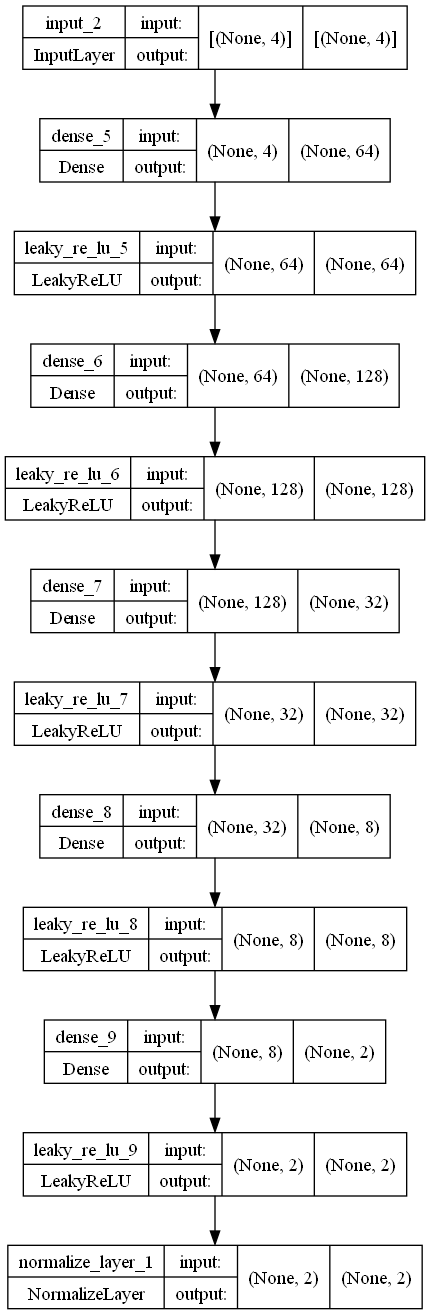

In [9]:
# Create and train the model
hiddens = [64, 128, 32, 8]
model2 = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True)

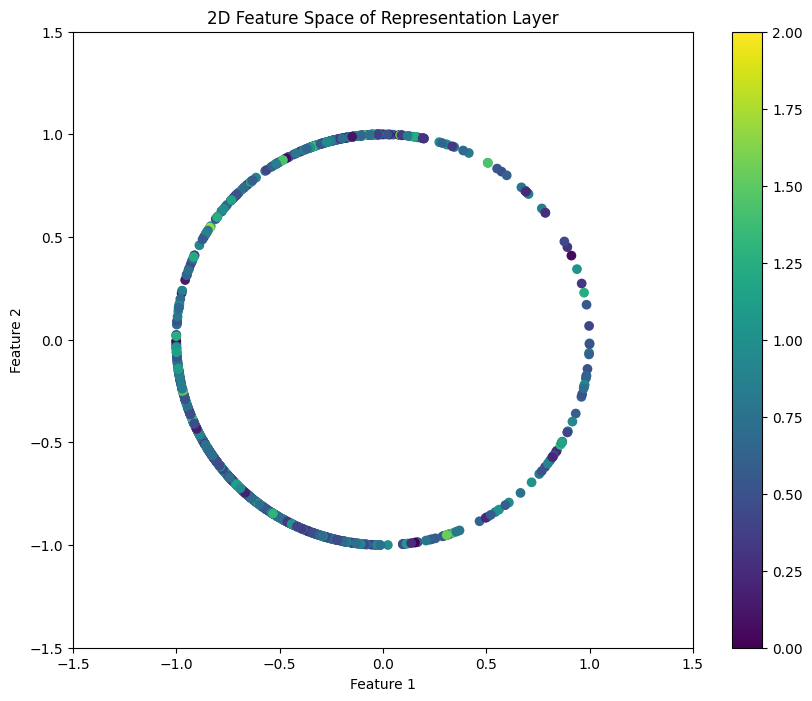

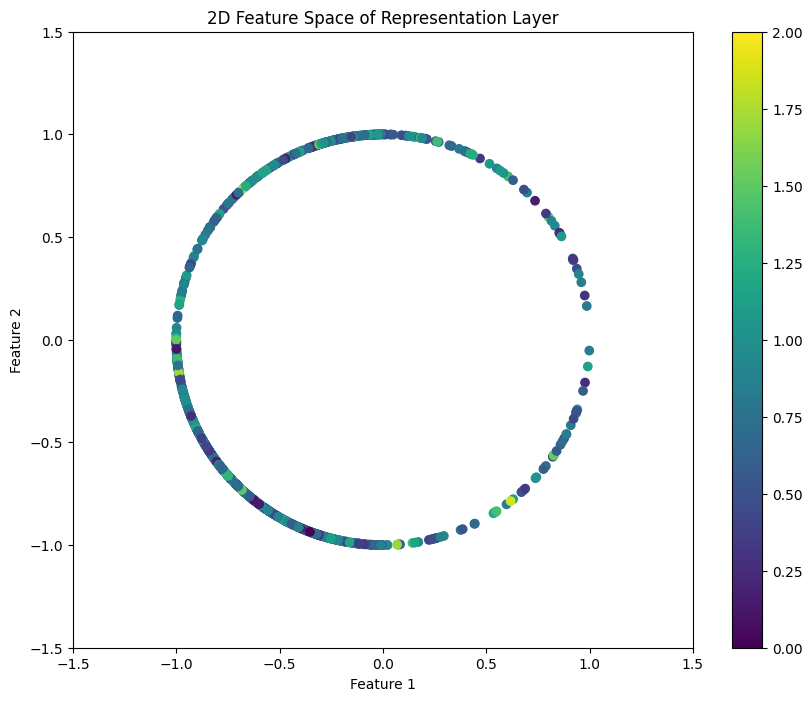

In [10]:
# Plot the 2D feature space
eva.plot_feature_space(model2, loader.X_train, loader.y_train)
eva.plot_feature_space(model2, loader.X_test, loader.y_test)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 33s 707ms/step - loss: 0.2947 - val_loss: 0.1447
Epoch 2/400
44/44 [==============================] - 30s 692ms/step - loss: 0.1182 - val_loss: 0.1370
Epoch 3/400
44/44 [==============================] - 29s 669ms/step - loss: 0.1120 - val_loss: 0.1358
Epoch 4/400
44/44 [==============================] - 29s 660ms/step - loss: 0.1074 - val_loss: 0.1323
Epoch 5/400
44/44 [==============================] - 29s 665ms/step - loss: 0.1078 - val_loss: 0.1326
Epoch 6/400
44/44 [==============================] - 30s 672ms/step - loss: 0.0968 - val_loss: 0.1318
Epoch 7/400
44/44 [==============================] - 30s 681ms/step - loss: 0.1094 - val_loss: 0.1321
Epoch 8/400
44/44 [==============================] - 31s 714ms/step - loss: 0.1083 - val_loss: 0.1306
Epoch 9/400
44/44 [==============================] - 31s 709ms/step - loss: 0.1014 - val_loss: 0.1332
Epoch 10/400
44/44 [=========

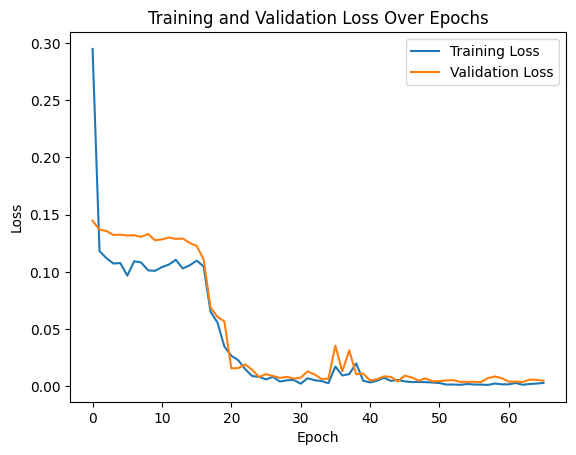

Epoch 1/57
63/63 [==============================] - 46s 714ms/step - loss: 0.0103
Epoch 2/57
63/63 [==============================] - 43s 680ms/step - loss: 0.0042
Epoch 3/57
63/63 [==============================] - 46s 723ms/step - loss: 0.0043
Epoch 4/57
63/63 [==============================] - 43s 683ms/step - loss: 0.0055
Epoch 5/57
63/63 [==============================] - 43s 689ms/step - loss: 0.0052
Epoch 6/57
63/63 [==============================] - 43s 685ms/step - loss: 0.0069
Epoch 7/57
63/63 [==============================] - 43s 684ms/step - loss: 0.0050
Epoch 8/57
63/63 [==============================] - 43s 682ms/step - loss: 0.0022
Epoch 9/57
63/63 [==============================] - 43s 685ms/step - loss: 0.0149
Epoch 10/57
63/63 [==============================] - 43s 683ms/step - loss: 0.0124
Epoch 11/57
63/63 [==============================] - 48s 762ms/step - loss: 0.0040
Epoch 12/57
63/63 [==============================] - 44s 704ms/step - loss: 0.0024
Epoch 13/57
6

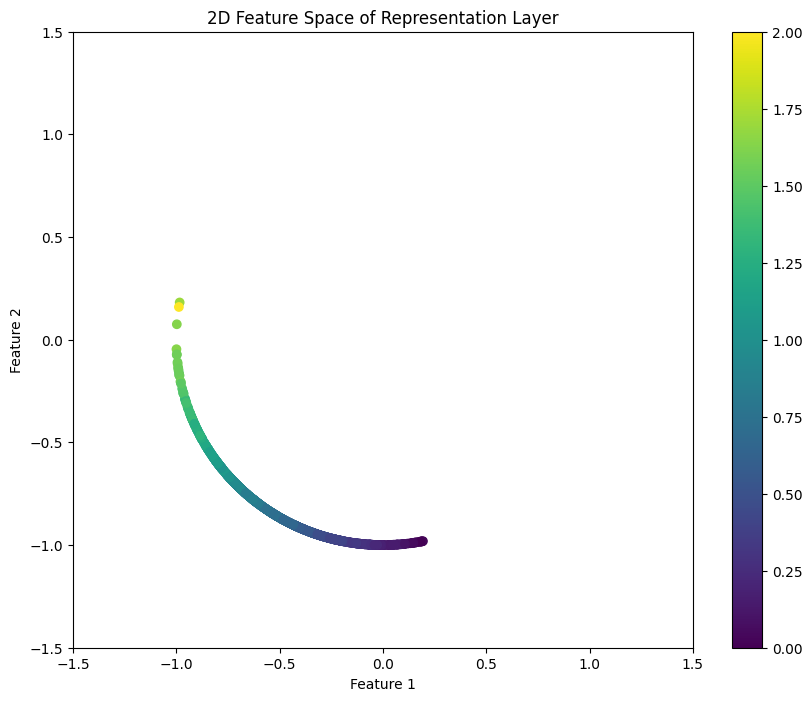

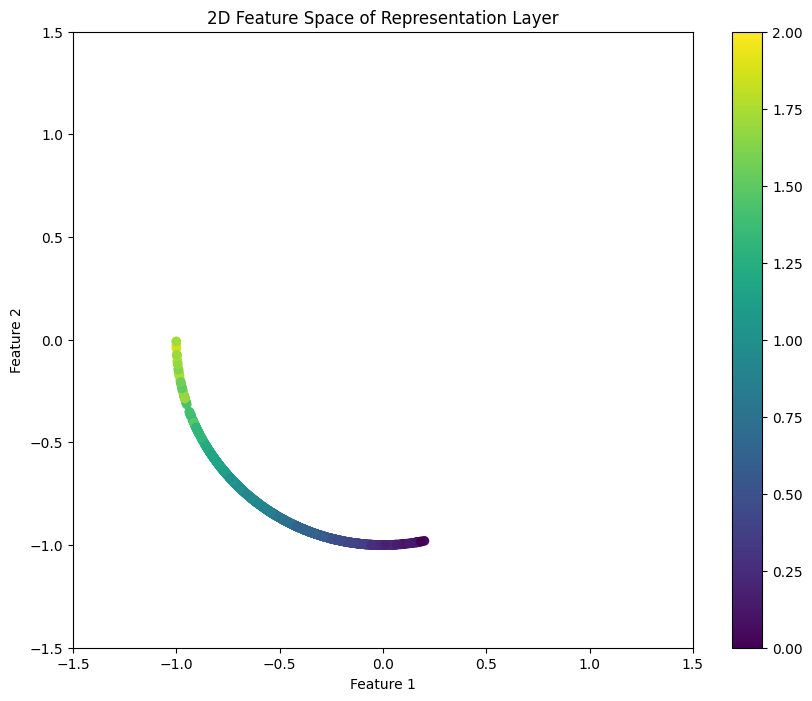

In [11]:
history = mb.train_features(model2, loader.X_train, loader.y_train, sample_joint_weights=loader.jreweights,
                            learning_rate=1e-3, epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model2, loader.X_train, loader.y_train)
eva.plot_feature_space(model2, loader.X_test, loader.y_test)

In [ ]:
history = mb.train_features(model2, loader.X_train, loader.y_train, sample_joint_weights=loader.jreweights,
                            learning_rate=1e-3, epochs=400, batch_size=16)